In [1]:
from numpy import *
from matplotlib.pylab import *
%matplotlib inline

Resolvamos
$$\frac{d \vec p}{dt} = -\frac{GMm}{|\vec{r}-\vec{r_M}|} (\hat{\vec{r}-\vec{r_M}})$$

Consideremos el movimiento en el plano $z$, i.e, $z=\dot{z}=0$ y sin perdida de generalidad $\vec{r_M}=0$


Por lo que llegamos a

$$ \frac{d^2 r}{dt^2} = - \frac{GM}{r^2}\hat{r}$$


Haciendo el cambio de variable 
$$\rho = \frac{\vec r}{R_T}$$ donde $R_T = <r(t)>$
$$\tau = \sqrt{\frac{GM}{R_t^3}}t $$
Tenemos $$\frac{d^2}{d\tau^2} = \frac{GM}{R_T^3}\frac{d^2 }{dt^2}$$

Así llegamos a 
$$ \frac{d^2 \vec \rho}{d\tau^2} = -\frac{\vec \rho}{\rho^3}$$

In [102]:
def RK2(ec, p_ini, x, h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange(len(tiempos)-1): 
        k = h*ec(sol[i,:],tiempos[i])
        f = ec(sol[i,:]+0.5*k,tiempos[i]+0.5*h)
        sol[i+1,:] = sol[i,:]+h*f
    return tiempos,sol

def integra2(ec,d_ec,p_ini,x,h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange(len(tiempos)-1): #xrange ocupa menos memoria para cualquier for que valga mas de 100
        f=ec(sol[i,:],tiempos[i])
        df,jac=d_ec(sol[i,:],tiempos[i])
        sol[i+1,:]=sol[i,:]+h*f+(0.5*h*h*(df+dot(jac,f)))
    return tiempos,sol

def RK4(ec, p_ini, x, h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange(len(tiempos)-1): 
        k1 = ec(sol[i,:],tiempos[i])
        k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
        k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
        k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
        sol[i+1,:] = sol[i,:] + h*(k1+2*k2+2*k3+k4)/6
    return tiempos,sol

In [103]:
def mov_planetario(x, t):
    r3 = (x[0]*x[0]+x[1]*x[1])**(1.5)
    drx = x[2]
    dry = x[3]
    dvrx = -x[0]/r3
    dvry = -x[1]/r3
    return array([drx, dry, dvrx, dvry])

def J_mov_planetario(x, t):
    d_ec = array([0,0,0,0])
    r5 = (x[0]*x[0]+x[1]*x[1])**(2.5)
    rxmry = (2*x[0]*x[0]-x[1]*x[1])/r5
    rymrx = (2*x[1]*x[1]-x[0]*x[0])/r5
    rxry = (3*x[0]*x[1])/r5
    Jac = array([[0,0,1,0],[0,0,0,1],[rxmry, rxry, 0,0],[rxry,rymrx,0,0]])
    
    return d_ec, Jac

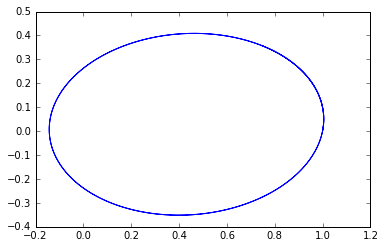

In [104]:
t, r_vr = RK2(mov_planetario, array([1.0, 0.0, 0.1, 0.5]), [0,2*pi], 2.0e-5)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(r_vr[:,0], r_vr[:,1])
ax.set_aspect('equal');

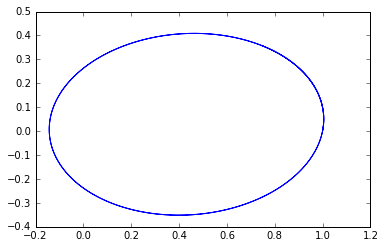

In [105]:
t, r_vr2 = integra2(mov_planetario, J_mov_planetario, array([1.0, 0.0, 0.1, 0.5]), [0,2*pi], 2.0e-5)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(r_vr[:,0], r_vr[:,1])
ax.set_aspect('equal');

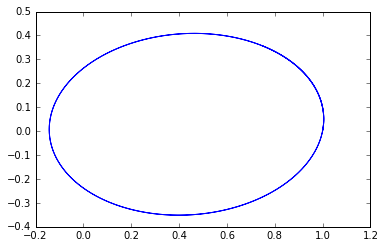

In [106]:
t, r_vr = RK4(mov_planetario, array([1.0, 0.0, 0.1, 0.5]), [0,2*pi], 2.0e-5)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(r_vr[:,0], r_vr[:,1])
ax.set_aspect('equal');